Libraries and configuration

In [57]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import probplot, skew, norm

plt.style.use('default')

class bc:
    HEADER = '\033[95m'
    OKBLUE = '\033[94m'
    OKCYAN = '\033[96m'
    OKGREEN = '\033[92m'
    WARNING = '\033[93m'
    FAIL = '\033[91m'
    ENDC = '\033[0m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'

Data

In [2]:
genotypes = ['WT MI', 'WT no MI(new)', 'MYC MI', 'MYC no MI']

In [3]:
def load_data(folder, type='monotot', sheet=0):
    data = pd.read_excel(folder + type + '_results(vox).xlsx', sheet_name=sheet)

    return (
        data['IntegratedIntensity'],
        data['VolumeUm'],
        data['DapiIntensityMean']
    )

Plotting

In [4]:
from scipy.stats import gaussian_kde


def plot_kde(
        neg, pos, title, include_hist=False,
        sub_index=None, n_rows=1, n_cols=1,
        xlim=None, labels=None
):
    if labels is None:
        labels = ['BrdU-', 'BrdU+']
        
    if sub_index:
        plt.subplot(n_rows, n_cols, sub_index)
    else:
        plt.figure(figsize=(8, 5))
        
    sns.rugplot(neg, color='red', alpha=.3, height=.1, linewidth=3.5, expand_margins=False)
    sns.rugplot(pos, color='green', alpha=.3, height=.1, linewidth=3.5, expand_margins=False)

    kde_1 = sns.kdeplot(neg, linewidth=4, color='red')
    kde_2 = sns.kdeplot(pos, linewidth=4, color='green')

    if include_hist:
        sns.histplot(x=neg, kde=True, color='red', alpha=.0, linewidth=0)
        sns.histplot(x=pos, kde=True, color='green', alpha=.0, linewidth=0)    
    
    plt.title(title)
    # plt.legend(labels, fontsize=14)
    plt.xlabel('')
    plt.ylabel('')
    plt.xticks(fontsize=0)
    plt.yticks(fontsize=0)
    
    if xlim:
        plt.xlim(xlim[0], xlim[1])
    plt.tight_layout()
    
    return kde_1.get_lines()[0].get_data(), kde_2.get_lines()[1].get_data()
    
    
def plot_boxplot(
        neg, pos, title,
        sub_index=None, n_rows=1, n_cols=1
):
    if sub_index:
        plt.subplot(n_rows, n_cols, sub_index)
    else:
        plt.figure(figsize=(10, 8))
        
    data = pd.melt(pd.DataFrame({
        'values': np.concatenate([neg, pos]),
        'group': ['Negative'] * len(neg) + ['Positive'] * len(pos)
    }), id_vars='group', var_name='features', value_name='value')
    
    sns.boxplot(
        data=data, 
        x='features', y='value',
        hue='group', palette=['red', 'green']
    )
    
    plt.title(title)
    plt.legend(['Negative', 'Positive'])
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.tight_layout()
    
    
def plot_probability(
        neg, pos, title,
        sub_index=None, n_rows=1, n_cols=1
):
    if sub_index:
        plt.subplot(n_rows, n_cols, sub_index)
    else:
        plt.figure(figsize=(10, 8))
        
    skewness = skew(np.concatenate([neg, pos]))
    probplot(np.concatenate([neg, pos]), plot=plt)
    
    plt.title(title + f' (Skewness: {skewness:.2f})')
    plt.legend(['Negative', 'Positive'])
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.tight_layout()

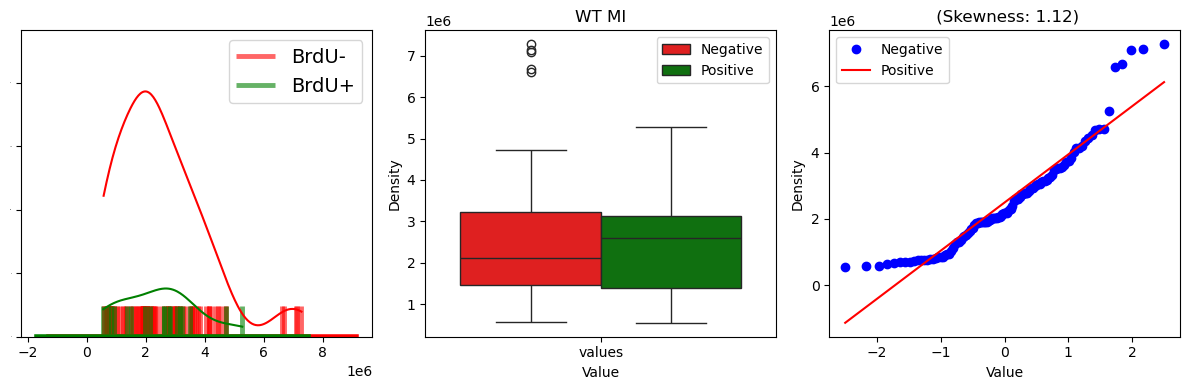

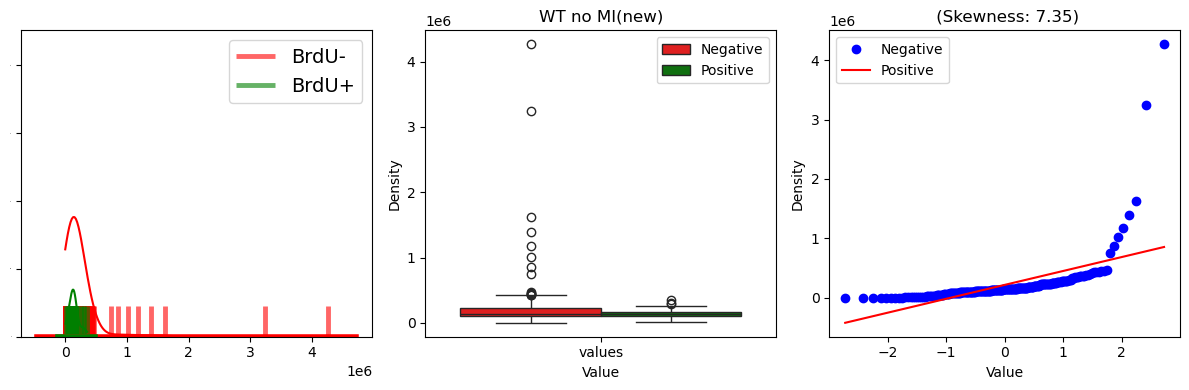

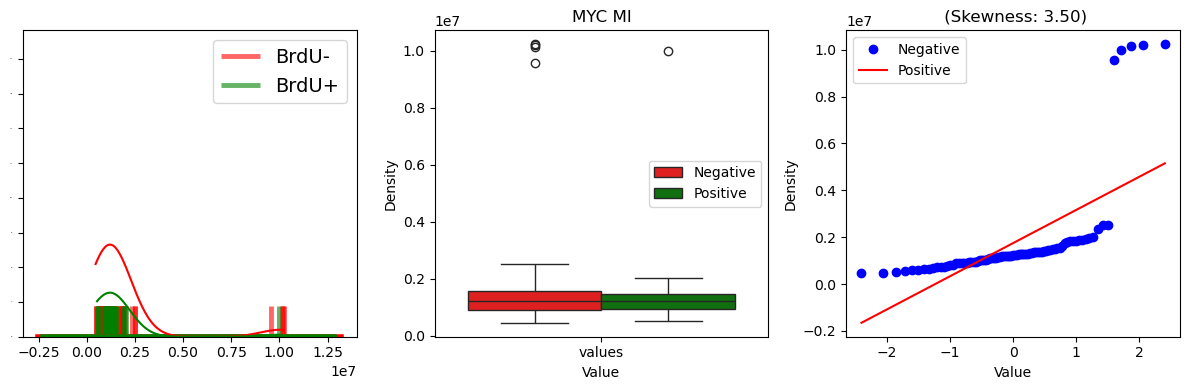

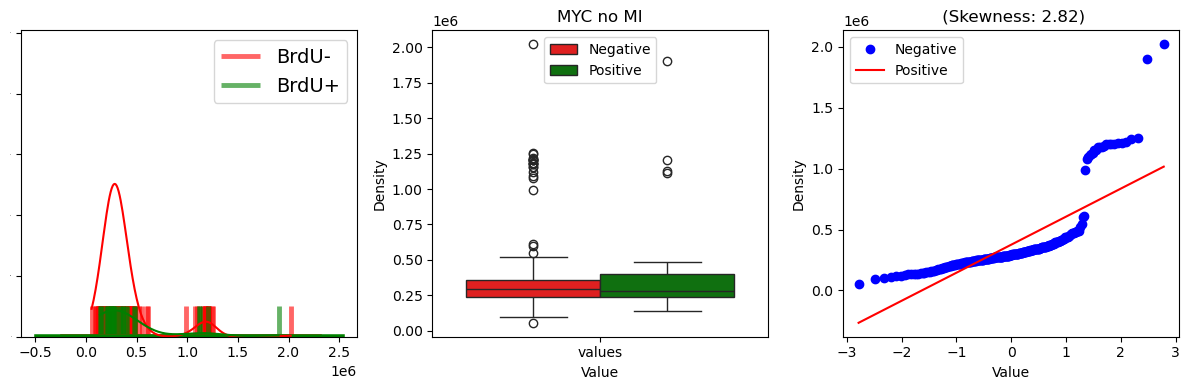

In [109]:
for i, genotype in enumerate(genotypes):
    plt.figure(figsize=(12, 4))
    
    folder = '/run/user/1003/gvfs/smb-share:server=tierra.cnic.es,share=sc/LAB_MT/LAB/Morena/Cri/Segmentation tests Mar2024/DATA/' + genotype + '/Segmentation(Stardist)/'
    
    mono_neg_intensity, _, _ = load_data(folder, 'monotot', 0)
    mono_pos_intensity, _, _ = load_data(folder, 'monotot', 1)

    bi_neg_intensity, _, _ = load_data(folder, 'bitot', 0)
    bi_pos_intensity, _, _ = load_data(folder, 'bitot', 1)
    
    plot_kde(mono_neg_intensity, mono_pos_intensity, '', True, 1, 1, 3)    
    plot_boxplot(mono_neg_intensity, mono_pos_intensity, f'{genotype}', 2, 1, 3)
    plot_probability(mono_neg_intensity, mono_pos_intensity, '', 3, 1, 3)

    plt.show()

KDE plots

In [5]:
def center_kde(data, center=0):
    def find_mode(data, bins=100):
        hist, bin_edges = np.histogram(data, bins=bins)
        return bin_edges[np.argmax(hist)]
    
    mu_mono_neg = find_mode(data['mono_neg'])
    mu_bi_neg = find_mode(data['bi_neg'])
    
    mono_neg_i_centered = data['mono_neg'] - mu_mono_neg + center
    mono_pos_i_centered = data['mono_pos'] - mu_mono_neg + center
    
    bi_neg_i_centered = data['bi_neg'] - mu_bi_neg + center
    bi_pos_i_centered = data['bi_pos'] - mu_bi_neg + center
    
    return mono_neg_i_centered, mono_pos_i_centered, bi_neg_i_centered, bi_pos_i_centered

def get_mu_s(data):
    return np.mean(data), np.std(data)

def normalize(data, mu, sigma):
    """Z-score normalization"""
    return (data - mu) / sigma


WT MI


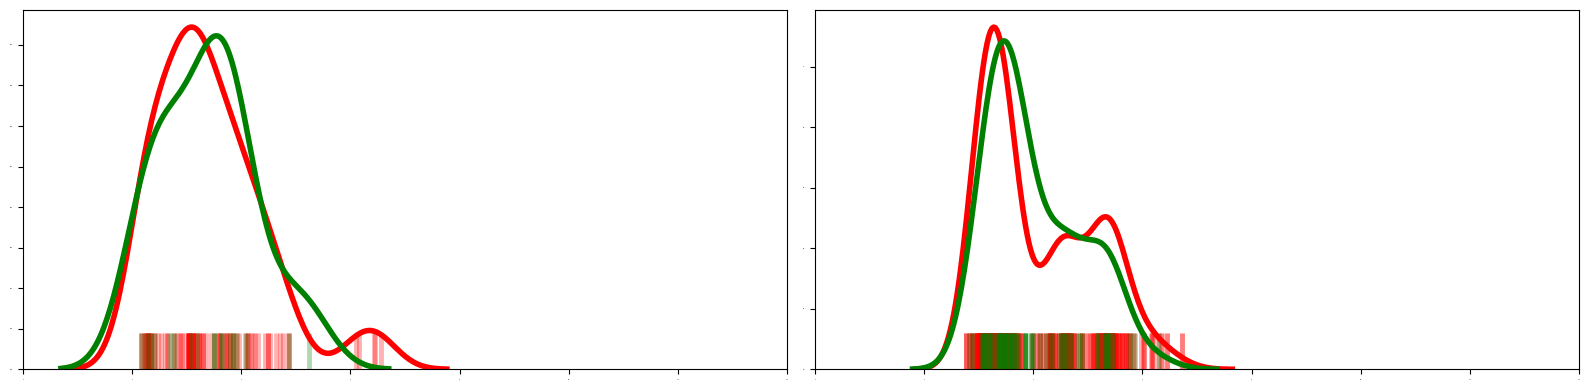

WT no MI(new)


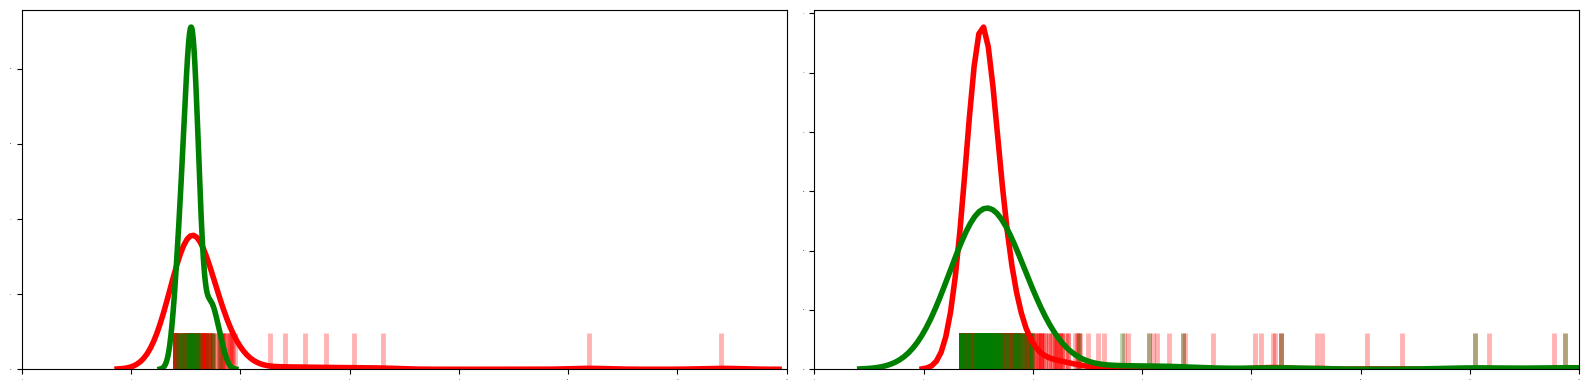

MYC MI


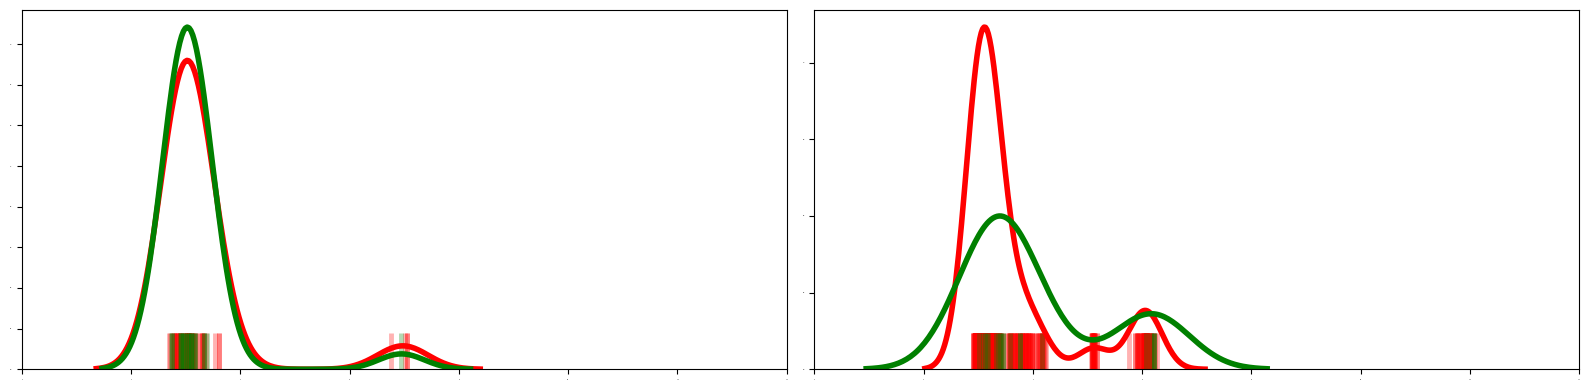

MYC no MI


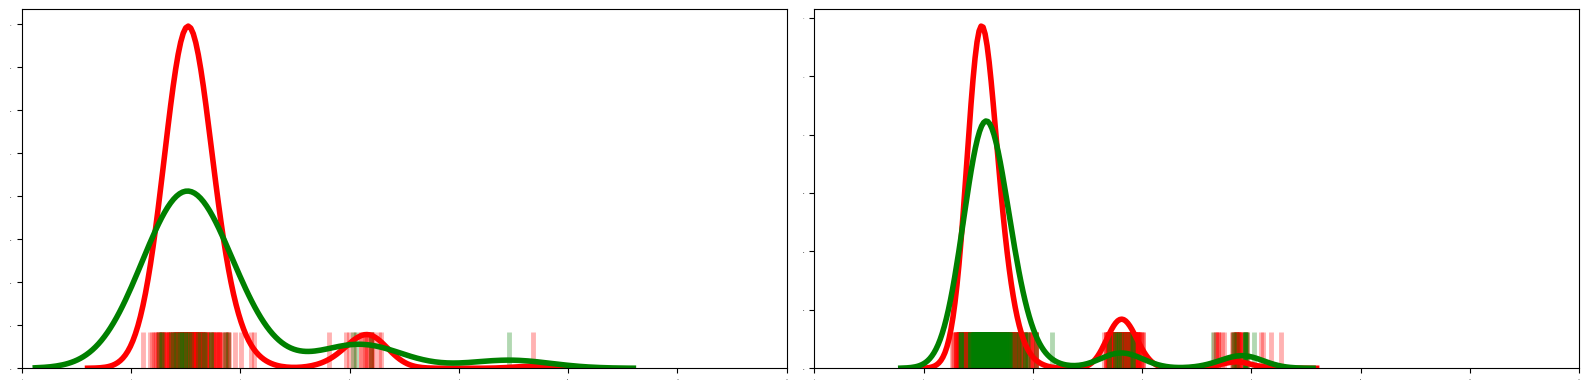

In [151]:
data = {g:[] for g in genotypes}

for i, genotype in enumerate(genotypes):
    plt.figure(figsize=(16, 4))
    
    folder = '/run/user/1003/gvfs/smb-share:server=tierra.cnic.es,share=sc/LAB_MT/LAB/Morena/Cri/Segmentation tests Mar2024/DATA/' + genotype + '/Segmentation(Stardist)/'
    
    mono_neg_intensity, _, _ = load_data(folder, 'monotot', 0)
    mono_pos_intensity, _, _ = load_data(folder, 'monotot', 1)
    bi_neg_intensity, _, _ = load_data(folder, 'bitot', 0)
    bi_pos_intensity, _, _ = load_data(folder, 'bitot', 1)
        
    mono_mu, mono_sigma = get_mu_s(mono_neg_intensity)
    bi_mu, bi_sigma = get_mu_s(bi_neg_intensity)
    
    mono_neg_intensity, mono_pos_intensity, bi_neg_intensity, bi_pos_intensity = center_kde({
        'mono_neg': normalize(mono_neg_intensity, mu=mono_mu, sigma=mono_sigma),
        'mono_pos': normalize(mono_pos_intensity, mu=mono_mu, sigma=mono_sigma),
        'bi_neg': normalize(bi_neg_intensity, mu=bi_mu, sigma=bi_sigma),
        'bi_pos': normalize(bi_pos_intensity, mu=bi_mu, sigma=bi_sigma)
    }, center=3)
    
    print(genotype)
    plot_kde(
        mono_neg_intensity, mono_pos_intensity, 
        '', False, 1, 1, 2,
        xlim=[0, 14]
    )
    plot_kde(
        bi_neg_intensity, bi_pos_intensity, 
        '', False, 2, 1, 2,
        xlim=[0, 14]
    )
    
    plt.savefig(f'kde_{genotype}_SIN.svg', format='svg')
    plt.show()

Statistical testings

<span style="color:red">**Revisar tipo de tests**</span>

As we are dealing with data with a bimodal distribution, we can use a two-sample t-test if the data is approximately normally distributed within each mode.

If the data is not normally distributed, we can use the Mann-Whitney U test. This test is a non-parametric test that does not assume normality in the data. At the contrary of the t-test, in which we compare the means, the **Mann-Whitney U test compares the differences in the rank sums of the two groups.**

In [6]:
def get_groups(
        genotype_1, genotype_2,
        type_1, type_2,
        brdu_1, brdu_2
):
    """
    Get the groups for the statistical tests.
    - Genotypes: WT MI, WT no MI, MYC MI, MYC no MI
    - Types: monotot, bitot
    - BrdU: 0, 1 (negative, positive)
    :return: 
    """
    
    folder_1 = '/run/user/1003/gvfs/smb-share:server=tierra.cnic.es,share=sc/LAB_MT/LAB/Morena/Cri/Segmentation tests Mar2024/DATA/' + genotype_1 + '/Segmentation(Stardist)/'
    
    folder_2 = '/run/user/1003/gvfs/smb-share:server=tierra.cnic.es,share=sc/LAB_MT/LAB/Morena/Cri/Segmentation tests Mar2024/DATA/' + genotype_2 + '/Segmentation(Stardist)/'
        
    group_1, _, _ = load_data(folder_1, type_1, brdu_1)
    group_2, _, _ = load_data(folder_2, type_2, brdu_2)
    
    return group_1, group_2

In [7]:
from scipy.stats import levene
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu
from scipy.stats import ks_2samp


def perform_test(group_1, group_2, type='t_test', plot=False, labels=None, title=''):
    """
    type: t_test, mann_whitney
    :return: 
    """
    # Test equality of variances
    _, p_val = levene(group_1, group_2)
    # print(
    #     f'Levene test: {p_val:.2f}'
    #     f'{" (Equal variances)" if p_val > 0.05 else " (Different variances)"}'
    # )
    
    if type == 't_test':
        # Two-sample t-test
        t_stat, p_value = ttest_ind(
            group_1, group_2,
            equal_var=False if p_val < 0.05 else True
        )
        print(
            f'{bc.BOLD}Two-sample t-test: {bc.ENDC}{p_value}'
            f'{" (Equal means)" if p_value > 0.05 else " (Different means)"}'
        )
    elif type == 'mann_whitney':
        # Mann-Whitney U test
        stat, p_value = mannwhitneyu(group_1, group_2)
        print(
            f'{bc.BOLD}Mann-Whitney U test: {bc.ENDC}{p_value}'
            f'{" (Equal means)" if p_value > 0.05 else " (Different means)"}'
        )
        
    if type == 'kolmogorov':
        stat, p_value = ks_2samp(group_1, group_2)
        print(
            f'{bc.BOLD}Kolmogorov-Smirnov test: {bc.ENDC}{p_value}'
            f'{" (Equal distributions)" if p_value > 0.05 else " (Different distributions)"}'
        )
        
    else:
        raise ValueError('Invalid test type')
    
    if plot:
        plot_kde(group_1, group_2, title, False, labels=labels)
        plt.show()

Compare BrdU positive and negative cells for each genotype

Monotot

In [176]:
for i, genotype in enumerate(genotypes):
    print(f'{bc.OKBLUE}Genotype: {bc.ENDC}{genotype}')
    mono_neg, mono_pos = get_groups(genotype, genotype, 'monotot', 'monotot', 0, 1)
    
    mu, sigma = get_mu_s(mono_neg)
    mono_neg = normalize(mono_neg, mu, sigma)
    mono_pos = normalize(mono_pos, mu, sigma)
    
    perform_test(mono_neg, mono_pos, 'mann_whitney', False)
    print()

Genotype: WT MI
Mann-Whitney U test: 0.94316 (Equal means)

Genotype: WT no MI(new)
Mann-Whitney U test: 0.36210 (Equal means)

Genotype: MYC MI
Mann-Whitney U test: 0.91168 (Equal means)

Genotype: MYC no MI
Mann-Whitney U test: 0.96577 (Equal means)



Bitot

In [177]:
for i, genotype in enumerate(genotypes):
    print(f'{bc.OKBLUE}Genotype: {bc.ENDC}{genotype}')
    bi_neg, bi_pos = get_groups(genotype, genotype, 'bitot', 'bitot', 0, 1)
    
    mu, sigma = get_mu_s(bi_neg)
    bi_neg = normalize(bi_neg, mu, sigma)
    bi_pos = normalize(bi_pos, mu, sigma)
    
    perform_test(bi_neg, bi_pos, 'mann_whitney', False)
    print()

Genotype: WT MI
Mann-Whitney U test: 0.68957 (Equal means)

Genotype: WT no MI(new)
Mann-Whitney U test: 0.02050 (Different means)

Genotype: MYC MI
Mann-Whitney U test: 0.00269 (Different means)

Genotype: MYC no MI
Mann-Whitney U test: 0.00485 (Different means)



Compare Myc and WT genotypes

Situations:
- MYC no MI mono negative vs WT no MI mono negative
- MYC MI mono negative vs WT MI mono negative
- MYC MI mono positive vs WT MI mono positive 

MYC no MI mono negative vs WT no MI mono negative

Kolmogorov-Smirnov test: 5.430277850403058e-32 (Different distributions)


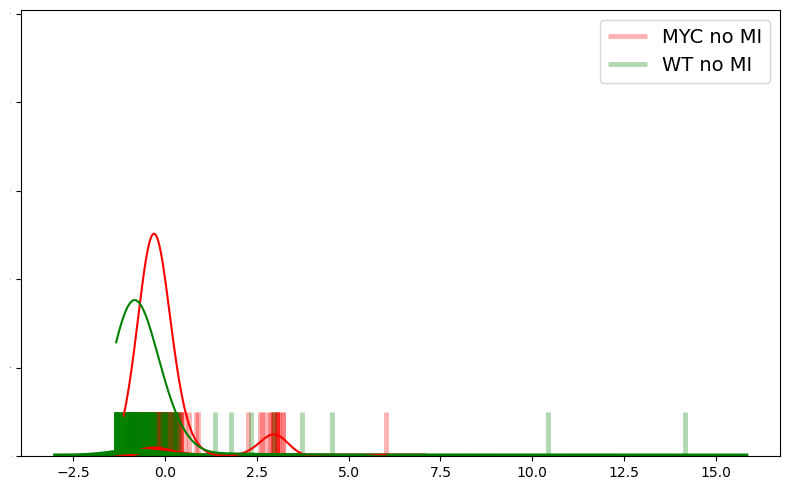

In [128]:
group_1, group_2 = get_groups('MYC no MI', 'WT no MI(new)', 'monotot', 'monotot', 0, 0)

mu, sigma = get_mu_s(group_1)
group_1 = normalize(group_1, mu, sigma)
group_2 = normalize(group_2, mu, sigma)

perform_test(group_1, group_2, 'kolmogorov', True, labels=['MYC no MI', 'WT no MI'])

MYC MI mono negative vs WT MI mono negative

Kolmogorov-Smirnov test: 5.35261498044624e-10 (Different distributions)


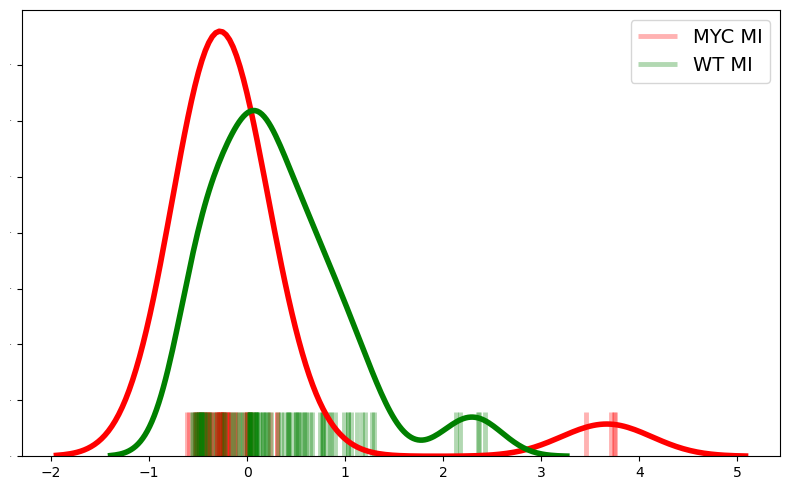

In [119]:
group_1, group_2 = get_groups('MYC MI', 'WT MI', 'monotot', 'monotot', 0, 0)

mu, sigma = get_mu_s(group_1)
group_1 = normalize(group_1, mu, sigma)
group_2 = normalize(group_2, mu, sigma)

perform_test(group_1, group_2, 'kolmogorov', True, labels=['MYC MI', 'WT MI'])

MYC MI mono positive vs WT MI mono positive

Kolmogorov-Smirnov test: 0.0006602189828267252 (Different distributions)


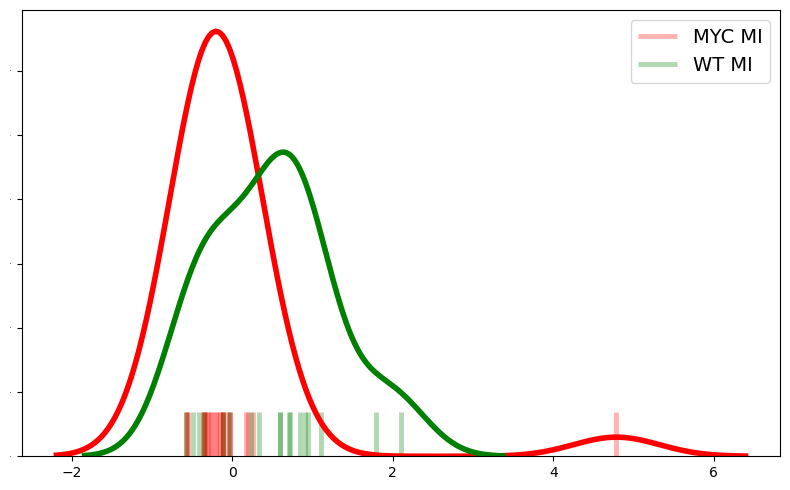

In [120]:
group_1, group_2 = get_groups('MYC MI', 'WT MI', 'monotot', 'monotot', 1, 1)

mu, sigma = get_mu_s(group_1)
group_1 = normalize(group_1, mu, sigma)
group_2 = normalize(group_2, mu, sigma)

perform_test(group_1, group_2, 'kolmogorov', True, labels=['MYC MI', 'WT MI'])

PAPER

- WT MI vs MYC no MI - bitot - BrdU negative
- WT MI vs MYC no MI - bitot - BrdU positive
- WT MI vs MYC no MI - bitot - All populations
----------------------------------------------
- MYC MI vs MYC no MI - bitot - BrdU negative
- MYC MI vs MYC no MI - bitot - BrdU positive
- MYC MI vs MYC no MI - bitot - All populations

Kolmogorov-Smirnov test: 1.04e-322 (Different distributions)


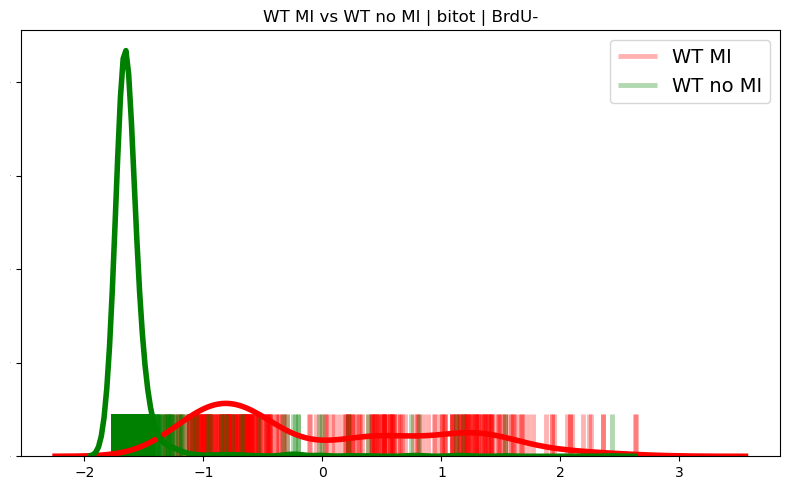

In [133]:
# WT MI vs WT no MI - bitot - BrdU negative
group_1, group_2 = get_groups('WT MI', 'WT no MI(new)', 'bitot', 'bitot', 0, 0)

mu, sigma = get_mu_s(group_1)
group_1 = normalize(group_1, mu, sigma)
group_2 = normalize(group_2, mu, sigma)

perform_test(
    group_1, group_2, 'kolmogorov', 
    True, labels=['WT MI', 'WT no MI'],
    title='WT MI vs WT no MI | bitot | BrdU-'
)

Kolmogorov-Smirnov test: 4.77395234464268e-52 (Different distributions)


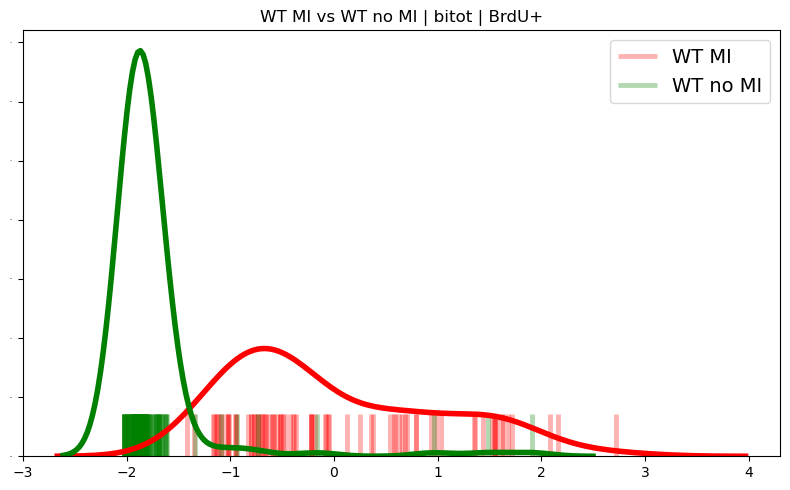

In [134]:
# WT MI vs WT no MI - bitot - BrdU positive
group_1, group_2 = get_groups('WT MI', 'WT no MI(new)', 'bitot', 'bitot', 1, 1)

mu, sigma = get_mu_s(group_1)
group_1 = normalize(group_1, mu, sigma)
group_2 = normalize(group_2, mu, sigma)

perform_test(
    group_1, group_2, 'kolmogorov', 
    True, labels=['WT MI', 'WT no MI'],
    title='WT MI vs WT no MI | bitot | BrdU+'
)

Kolmogorov-Smirnov test: 9e-323 (Different distributions)


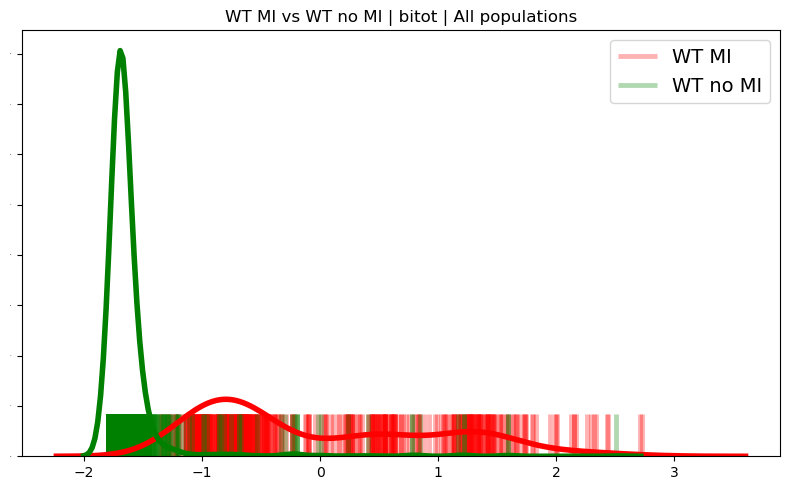

In [136]:
# WT MI vs WT no MI - bitot - All populations
group_1_neg, group_1_pos = get_groups('WT MI', 'WT MI', 'bitot', 'bitot', 0, 1)
group_2_neg, group_2_pos = get_groups('WT no MI(new)', 'WT no MI(new)', 'bitot', 'bitot', 0, 1)

group_1 = np.concatenate([group_1_neg, group_1_pos])
group_2 = np.concatenate([group_2_neg, group_2_pos])

mu, sigma = get_mu_s(group_1)
group_1 = normalize(group_1, mu, sigma)
group_2 = normalize(group_2, mu, sigma)

perform_test(
    group_1, group_2, 'kolmogorov', 
    True, labels=['WT MI', 'WT no MI'],
    title='WT MI vs WT no MI | bitot | All populations'
)

Kolmogorov-Smirnov test: 3.830092118234859e-289 (Different distributions)


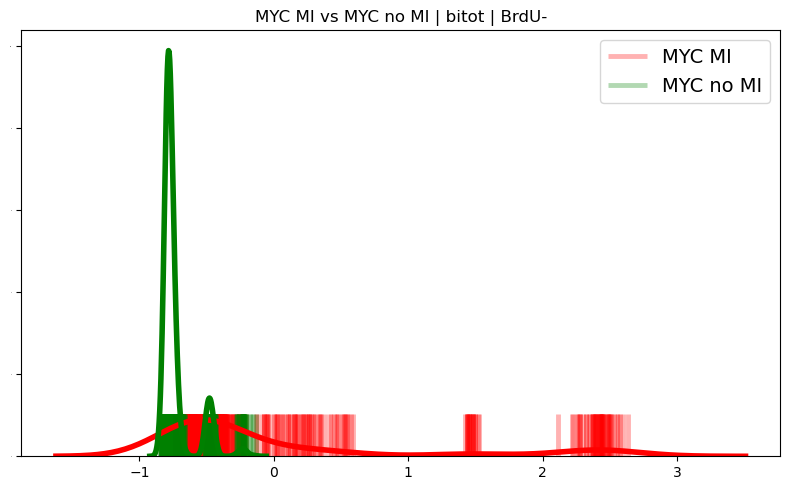

In [124]:
# MYC MI vs MYC no MI - bitot - BrdU negative
group_1, group_2 = get_groups('MYC MI', 'MYC no MI', 'bitot', 'bitot', 0, 0)

mu, sigma = get_mu_s(group_1)
group_1 = normalize(group_1, mu, sigma)
group_2 = normalize(group_2, mu, sigma)

perform_test(
    group_1, group_2, 'kolmogorov', 
    True, labels=['MYC MI', 'MYC no MI'],
    title='MYC MI vs MYC no MI | bitot | BrdU-'
)

Kolmogorov-Smirnov test: 6.012436344304233e-18 (Different distributions)


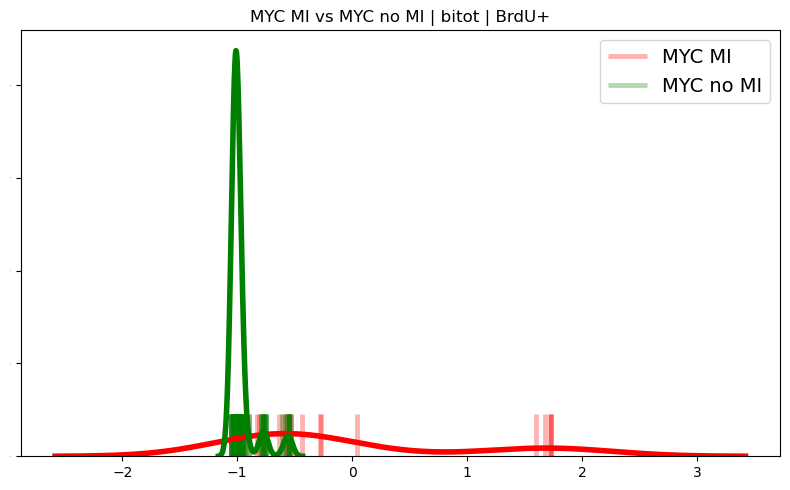

In [125]:
# MYC MI vs MYC no MI - bitot - BrdU positive
group_1, group_2 = get_groups('MYC MI', 'MYC no MI', 'bitot', 'bitot', 1, 1)

mu, sigma = get_mu_s(group_1)
group_1 = normalize(group_1, mu, sigma)
group_2 = normalize(group_2, mu, sigma)

perform_test(
    group_1, group_2, 'kolmogorov', 
    True, labels=['MYC MI', 'MYC no MI'],
    title='MYC MI vs MYC no MI | bitot | BrdU+'
)

Kolmogorov-Smirnov test: 1.7254491241922122e-307 (Different distributions)


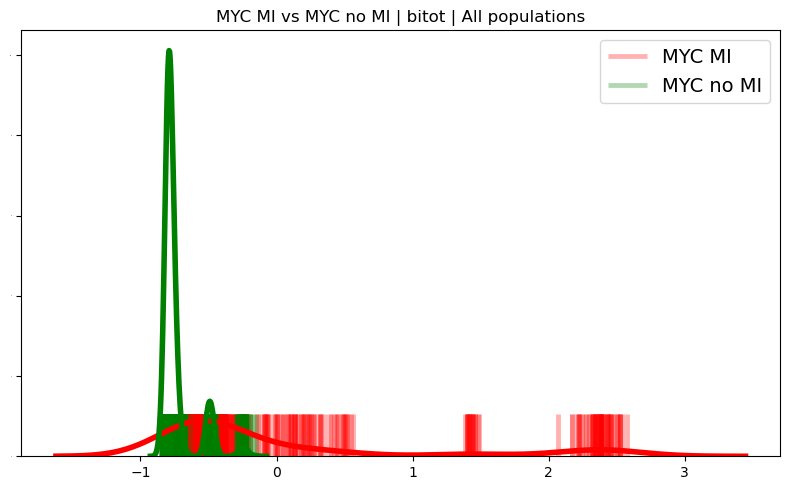

In [126]:
# MYC MI vs MYC no MI - bitot - All populations
group_1_neg, group_1_pos = get_groups('MYC MI', 'MYC MI', 'bitot', 'bitot', 0, 1)
group_2_neg, group_2_pos = get_groups('MYC no MI', 'MYC no MI', 'bitot', 'bitot', 0, 1)

group_1 = np.concatenate([group_1_neg, group_1_pos])
group_2 = np.concatenate([group_2_neg, group_2_pos])

mu, sigma = get_mu_s(group_1)
group_1 = normalize(group_1, mu, sigma)
group_2 = normalize(group_2, mu, sigma)

perform_test(
    group_1, group_2, 'kolmogorov', 
    True, labels=['MYC MI', 'MYC no MI'],
    title='MYC MI vs MYC no MI | bitot | All populations'
)

Using mutual information to compare distributions

In [19]:
# from sklearn.feature_selection import mutual_info_regression
from sklearn.metrics import mutual_info_score, adjusted_mutual_info_score, normalized_mutual_info_score

In [48]:
def get_kde(neg, pos):
    plt.ioff()
    kde_1 = sns.kdeplot(neg, linewidth=4, color='red')
    kde_2 = sns.kdeplot(pos, linewidth=4, color='green')
    plt.ion()
    return kde_1.get_lines()[0].get_data(), kde_2.get_lines()[0].get_data()

def corr_coef(X, Y):
    corr = np.corrcoef(X, Y)[0, 1]
    plt.plot(X, Y, '.')
    
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(f'Correlation coefficient: {corr:.6f}')
    plt.show()
    
def mutula_info(X, Y, bins=1000):
    hist_2d, x_edges, y_edges = np.histogram2d(X, Y, bins=bins)
    
    pxy = hist_2d / float(np.sum(hist_2d))
    px = np.sum(pxy, axis=1)
    py = np.sum(pxy, axis=0)
    px_py = px[:, None] * py[None, :]
    
    nonzeros = pxy > 0
    return np.sum(pxy[nonzeros] * np.log(pxy[nonzeros] / px_py[nonzeros]))

def plot_info(X, Y, x_interp, y_interp, X_mod, Y_mod, labels=None, num_points=1000):
    f, (ax_box1, ax_box2, ax_dist) = plt.subplots(
        3, sharex=True, gridspec_kw= {
            "height_ratios": (0.3, 0.3, 1)
        }
    )
    
    if labels is None:
        labels = ['X', 'Y']
    
    median_X = np.median(X)
    median_Y = np.median(Y)
        
    sns.boxplot(X, ax=ax_box1, color='r', orient='h')
    sns.boxplot(Y, ax=ax_box2, color='g', orient='h')
    ax_box1.axvline(median_X, color='r', linestyle='--')
    ax_box2.axvline(median_Y, color='g', linestyle='--')
    
    # common_bins = np.histogram_bin_edges(np.concatenate([X, Y]), bins=num_points)
    X_binned = np.digitize(X_mod, bins=np.histogram_bin_edges(X_mod, bins=num_points))
    Y_binned = np.digitize(Y_mod, bins=np.histogram_bin_edges(Y_mod, bins=num_points))
    stat, p_value = ks_2samp(X_binned, Y_binned)
    
    plt.subplots_adjust(top=0.87)
    plt.suptitle(
        f'Mutual Information={mutual_info_score(X_binned, Y_binned):.5f}'
        + f'\nAdjusted Mutual Information={adjusted_mutual_info_score(X_binned, Y_binned)}'
        + f'\nKolmogorov-Smirnov test p-val: {p_value}',
        fontsize = 10,
    )
    
    plt.plot(x_interp, X_mod, color='r', label=labels[0])
    plt.plot(y_interp, Y_mod, color='g', label=labels[1])
    
    plt.fill_between(x_interp, X_mod, color='red', alpha=0.2)
    plt.fill_between(y_interp, Y_mod, color='green', alpha=0.2)
    
    ax_dist.axvline(median_X, color='r', linestyle='--')
    ax_dist.axvline(median_Y, color='g', linestyle='--')
    
    plt.legend()
    ax_box1.set(xlabel='', ylabel='')
    ax_box2.set(xlabel='', ylabel='')
    ax_dist.set(
        xlabel='', ylabel='',
        xticklabels=[], yticklabels=[]
    )
    plt.savefig(f'{labels}.svg', format='svg')
    plt.show()

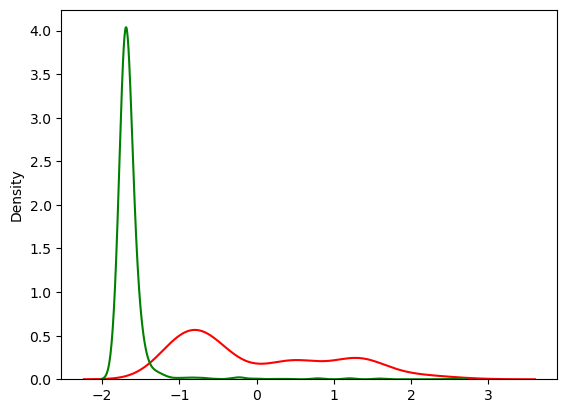

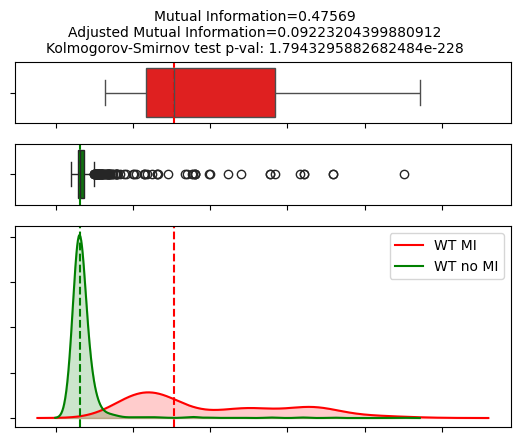

In [21]:
# WT MI vs WT no MI - bitot - All population
num_points = 1000 
X_neg, X_pos = get_groups('WT MI', 'WT MI', 'bitot', 'bitot', 0, 1)
Y_neg, Y_pos = get_groups('WT no MI(new)', 'WT no MI(new)', 'bitot', 'bitot', 0, 1)

X = np.concatenate([X_neg, X_pos])
Y = np.concatenate([Y_neg, Y_pos])

mu, sigma = get_mu_s(X)
X = np.array(normalize(X, mu, sigma))
Y = np.array(normalize(Y, mu, sigma))

kde_x = sns.kdeplot(X, color='red', gridsize=num_points).get_lines()[0].get_data()
kde_y = sns.kdeplot(Y, color='green', gridsize=num_points).get_lines()[1].get_data()

# Resample the KDEs to a common number of points
x_interp = np.linspace(kde_x[0].min(), kde_x[0].max(), num_points)
y_interp = np.linspace(kde_y[0].min(), kde_y[0].max(), num_points)
X_mod = np.interp(x_interp, kde_x[0], kde_x[1])
Y_mod = np.interp(y_interp, kde_y[0], kde_y[1])

plot_info(X, Y, x_interp, y_interp, X_mod, Y_mod, labels=['WT MI', 'WT no MI'], num_points=num_points)

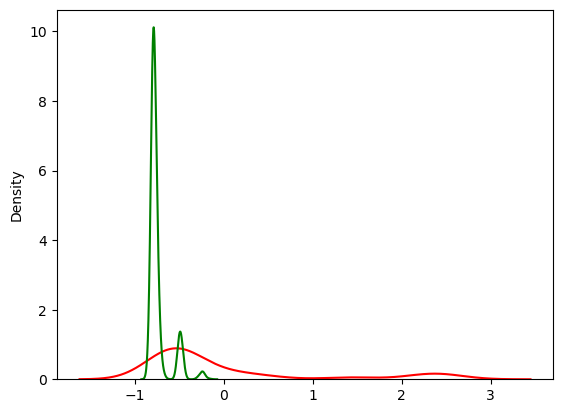

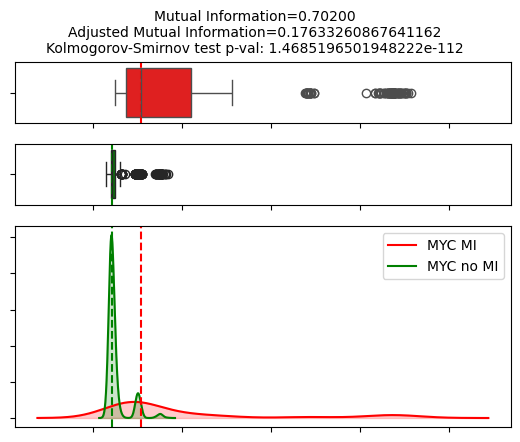

In [22]:
# MYC MI vs MYC no MI - bitot - All population
X_neg, X_pos = get_groups('MYC MI', 'MYC MI', 'bitot', 'bitot', 0, 1)
Y_neg, Y_pos = get_groups('MYC no MI', 'MYC no MI', 'bitot', 'bitot', 0, 1)

X = np.concatenate([X_neg, X_pos])
Y = np.concatenate([Y_neg, Y_pos])

mu, sigma = get_mu_s(X)
X = np.array(normalize(X, mu, sigma))
Y = np.array(normalize(Y, mu, sigma))

kde_x = sns.kdeplot(X, color='red', gridsize=num_points).get_lines()[0].get_data()
kde_y = sns.kdeplot(Y, color='green', gridsize=num_points).get_lines()[1].get_data()

# Resample the KDEs to a common number of points
x_interp = np.linspace(kde_x[0].min(), kde_x[0].max(), num_points)
y_interp = np.linspace(kde_y[0].min(), kde_y[0].max(), num_points)
X_mod = np.interp(x_interp, kde_x[0], kde_x[1])
Y_mod = np.interp(y_interp, kde_y[0], kde_y[1])

plot_info(X, Y, x_interp, y_interp, X_mod, Y_mod, labels=['MYC MI', 'MYC no MI'], num_points=num_points)

WT MI | Bi | BrdU+ vs WT no MI | Bi | BrdU+

WT MI | Bi | BrdU- vs WT no MI | Bi | BrdU-

WT MI | Mono | BrdU+ vs WT no MI | Mono | BrdU+

WT MI | Mono | BrdU- vs WT no MI | Mono | BrdU-
 
---

MYC MI | Bi | BrdU+ vs MYC no MI | Bi | BrdU+

MYC MI | Bi | BrdU- vs MYC no MI | Bi | BrdU-

MYC MI | Mono | BrdU+ vs MYC no MI | Mono | BrdU+

MYC MI | Mono | BrdU- vs MYC no MI | Mono | BrdU-

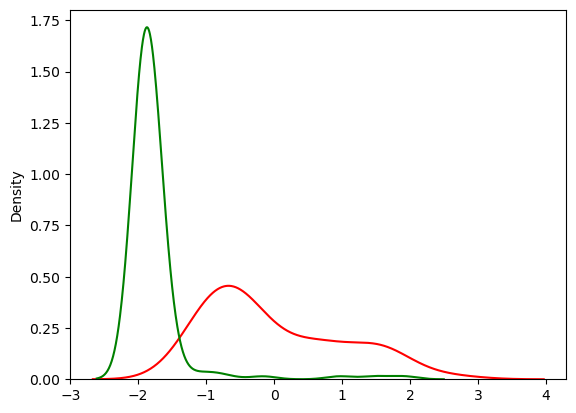

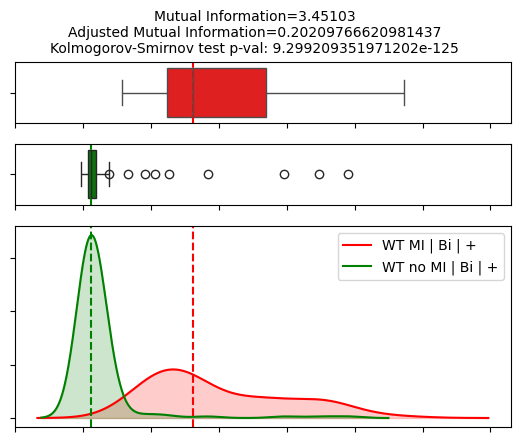

In [58]:
# WT MI | Bi | BrdU+ vs WT no MI | Bi | BrdU+
X, Y = get_groups('WT MI', 'WT no MI(new)', 'bitot', 'bitot', 1, 1)

mu, sigma = get_mu_s(X)
X = np.array(normalize(X, mu, sigma))
Y = np.array(normalize(Y, mu, sigma))

kde_x = sns.kdeplot(X, color='red', gridsize=num_points).get_lines()[0].get_data()
kde_y = sns.kdeplot(Y, color='green', gridsize=num_points).get_lines()[1].get_data()

# Resample the KDEs to a common number of points
x_interp = np.linspace(kde_x[0].min(), kde_x[0].max(), num_points)
y_interp = np.linspace(kde_y[0].min(), kde_y[0].max(), num_points)
X_mod = np.interp(x_interp, kde_x[0], kde_x[1])
Y_mod = np.interp(y_interp, kde_y[0], kde_y[1])

plot_info(X, Y, x_interp, y_interp, X_mod, Y_mod, labels=['WT MI | Bi | +', 'WT no MI | Bi | +'], num_points=num_points)

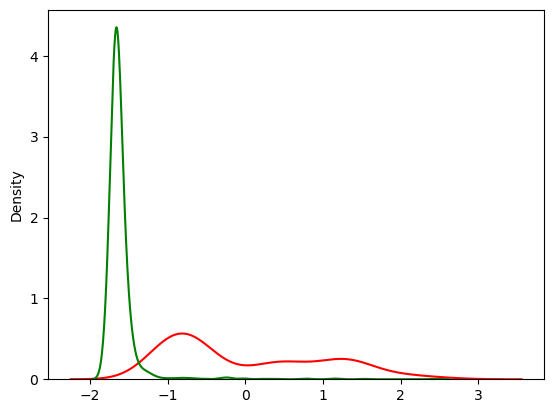

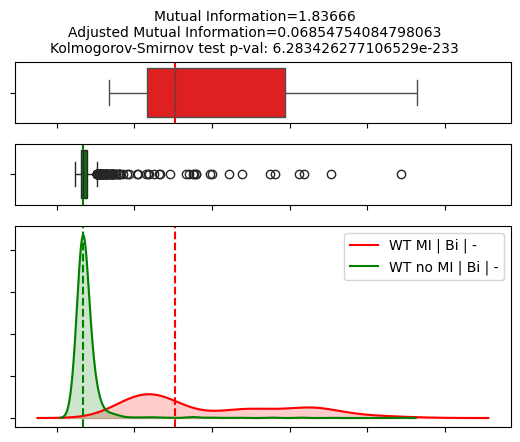

In [59]:
# WT MI | Bi | BrdU- vs WT no MI | Bi | BrdU- 
X, Y = get_groups('WT MI', 'WT no MI(new)', 'bitot', 'bitot', 0, 0)

mu, sigma = get_mu_s(X)
X = np.array(normalize(X, mu, sigma))
Y = np.array(normalize(Y, mu, sigma))

kde_x = sns.kdeplot(X, color='red', gridsize=num_points).get_lines()[0].get_data()
kde_y = sns.kdeplot(Y, color='green', gridsize=num_points).get_lines()[1].get_data()

# Resample the KDEs to a common number of points
x_interp = np.linspace(kde_x[0].min(), kde_x[0].max(), num_points)
y_interp = np.linspace(kde_y[0].min(), kde_y[0].max(), num_points)
X_mod = np.interp(x_interp, kde_x[0], kde_x[1])
Y_mod = np.interp(y_interp, kde_y[0], kde_y[1])

plot_info(X, Y, x_interp, y_interp, X_mod, Y_mod, labels=['WT MI | Bi | -', 'WT no MI | Bi | -'], num_points=num_points)

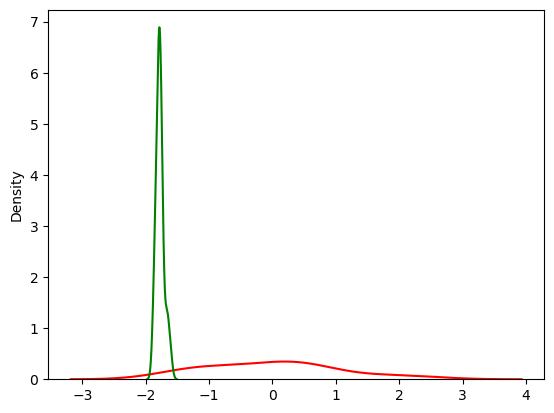

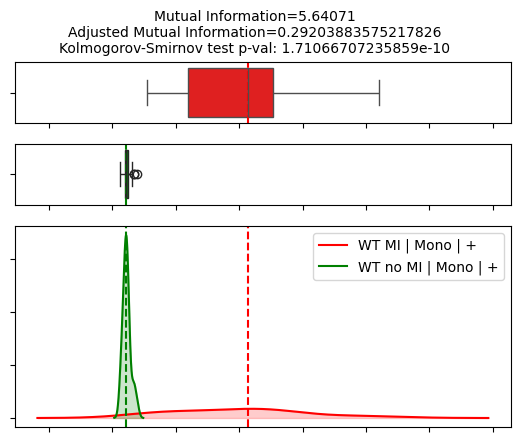

In [60]:
X, Y = get_groups('WT MI', 'WT no MI(new)', 'monotot', 'monotot', 1, 1)

mu, sigma = get_mu_s(X)
X = np.array(normalize(X, mu, sigma))
Y = np.array(normalize(Y, mu, sigma))

kde_x = sns.kdeplot(X, color='red', gridsize=num_points).get_lines()[0].get_data()
kde_y = sns.kdeplot(Y, color='green', gridsize=num_points).get_lines()[1].get_data()

# Resample the KDEs to a common number of points
x_interp = np.linspace(kde_x[0].min(), kde_x[0].max(), num_points)
y_interp = np.linspace(kde_y[0].min(), kde_y[0].max(), num_points)
X_mod = np.interp(x_interp, kde_x[0], kde_x[1])
Y_mod = np.interp(y_interp, kde_y[0], kde_y[1])

plot_info(X, Y, x_interp, y_interp, X_mod, Y_mod, labels=['WT MI | Mono | +', 'WT no MI | Mono | +'], num_points=num_points)

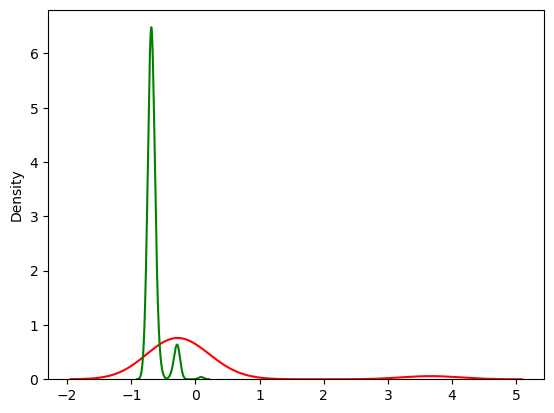

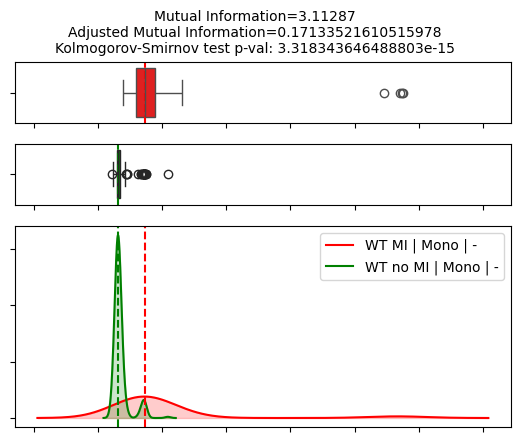

In [61]:
# MYC MI | Bi | BrdU- vs MYC no MI | Bi | BrdU-
X, Y = get_groups('MYC MI', 'MYC no MI', 'monotot', 'monotot', 0, 0)

mu, sigma = get_mu_s(X)
X = np.array(normalize(X, mu, sigma))
Y = np.array(normalize(Y, mu, sigma))

kde_x = sns.kdeplot(X, color='red', gridsize=num_points).get_lines()[0].get_data()
kde_y = sns.kdeplot(Y, color='green', gridsize=num_points).get_lines()[1].get_data()

# Resample the KDEs to a common number of points
x_interp = np.linspace(kde_x[0].min(), kde_x[0].max(), num_points)
y_interp = np.linspace(kde_y[0].min(), kde_y[0].max(), num_points)
X_mod = np.interp(x_interp, kde_x[0], kde_x[1])
Y_mod = np.interp(y_interp, kde_y[0], kde_y[1])

plot_info(X, Y, x_interp, y_interp, X_mod, Y_mod, labels=['WT MI | Mono | -', 'WT no MI | Mono | -'], num_points=num_points)

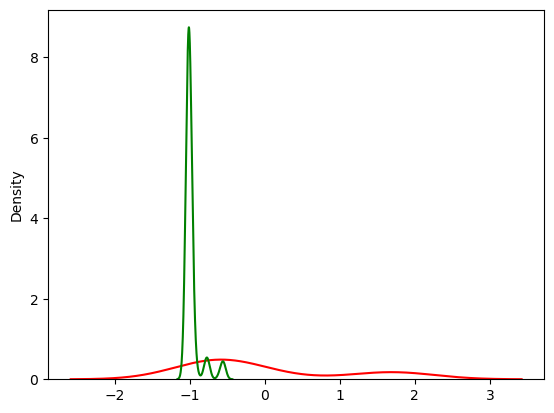

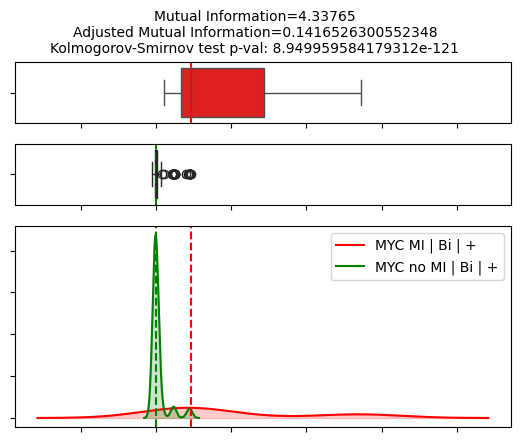

In [62]:
X, Y = get_groups('MYC MI', 'MYC no MI', 'bitot', 'bitot', 1, 1)

mu, sigma = get_mu_s(X)
X = np.array(normalize(X, mu, sigma))
Y = np.array(normalize(Y, mu, sigma))

kde_x = sns.kdeplot(X, color='red', gridsize=num_points).get_lines()[0].get_data()
kde_y = sns.kdeplot(Y, color='green', gridsize=num_points).get_lines()[1].get_data()

# Resample the KDEs to a common number of points
x_interp = np.linspace(kde_x[0].min(), kde_x[0].max(), num_points)
y_interp = np.linspace(kde_y[0].min(), kde_y[0].max(), num_points)
X_mod = np.interp(x_interp, kde_x[0], kde_x[1])
Y_mod = np.interp(y_interp, kde_y[0], kde_y[1])

plot_info(X, Y, x_interp, y_interp, X_mod, Y_mod, labels=['MYC MI | Bi | +', 'MYC no MI | Bi | +'], num_points=num_points)

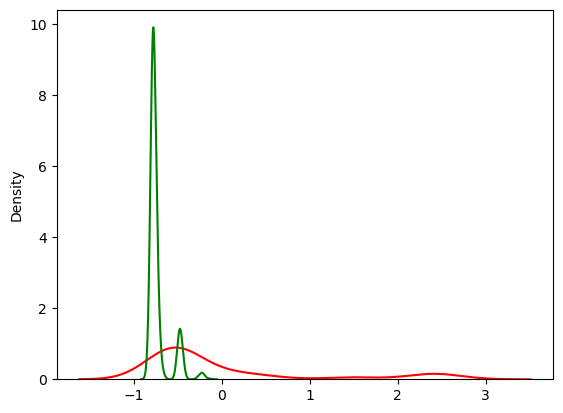

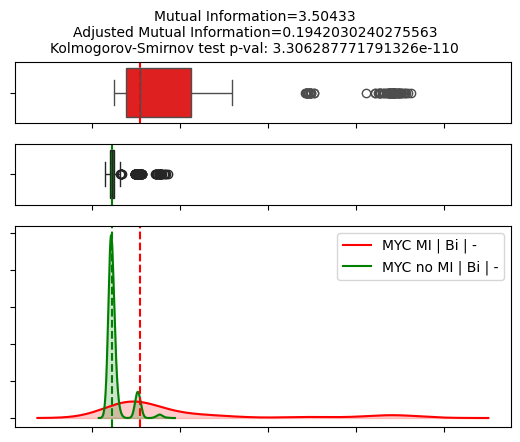

In [63]:
X, Y = get_groups('MYC MI', 'MYC no MI', 'bitot', 'bitot', 0, 0)

mu, sigma = get_mu_s(X)
X = np.array(normalize(X, mu, sigma))
Y = np.array(normalize(Y, mu, sigma))

kde_x = sns.kdeplot(X, color='red', gridsize=num_points).get_lines()[0].get_data()
kde_y = sns.kdeplot(Y, color='green', gridsize=num_points).get_lines()[1].get_data()

# Resample the KDEs to a common number of points
x_interp = np.linspace(kde_x[0].min(), kde_x[0].max(), num_points)
y_interp = np.linspace(kde_y[0].min(), kde_y[0].max(), num_points)
X_mod = np.interp(x_interp, kde_x[0], kde_x[1])
Y_mod = np.interp(y_interp, kde_y[0], kde_y[1])

plot_info(X, Y, x_interp, y_interp, X_mod, Y_mod, labels=['MYC MI | Bi | -', 'MYC no MI | Bi | -'], num_points=num_points)

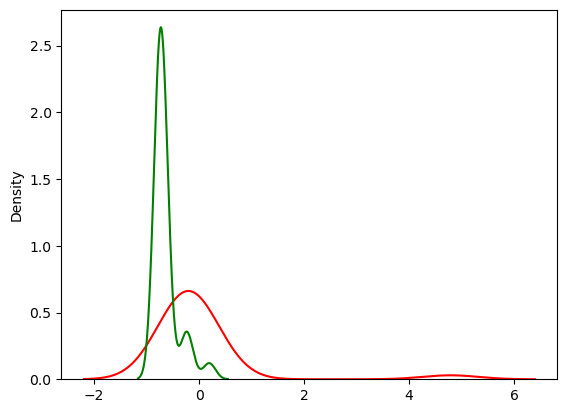

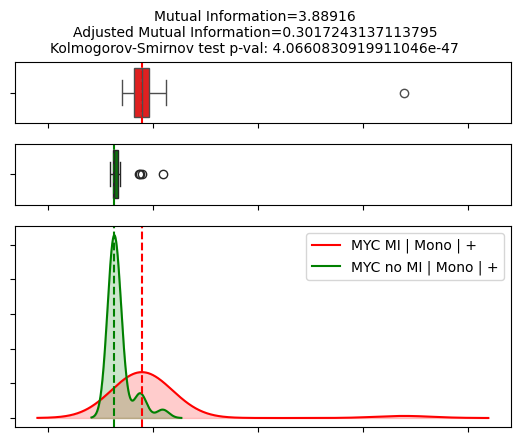

In [64]:
X, Y = get_groups('MYC MI', 'MYC no MI', 'monotot', 'monotot', 1, 1)

mu, sigma = get_mu_s(X)
X = np.array(normalize(X, mu, sigma))
Y = np.array(normalize(Y, mu, sigma))

kde_x = sns.kdeplot(X, color='red', gridsize=num_points).get_lines()[0].get_data()
kde_y = sns.kdeplot(Y, color='green', gridsize=num_points).get_lines()[1].get_data()

# Resample the KDEs to a common number of points
x_interp = np.linspace(kde_x[0].min(), kde_x[0].max(), num_points)
y_interp = np.linspace(kde_y[0].min(), kde_y[0].max(), num_points)
X_mod = np.interp(x_interp, kde_x[0], kde_x[1])
Y_mod = np.interp(y_interp, kde_y[0], kde_y[1])

plot_info(X, Y, x_interp, y_interp, X_mod, Y_mod, labels=['MYC MI | Mono | +', 'MYC no MI | Mono | +'], num_points=num_points)

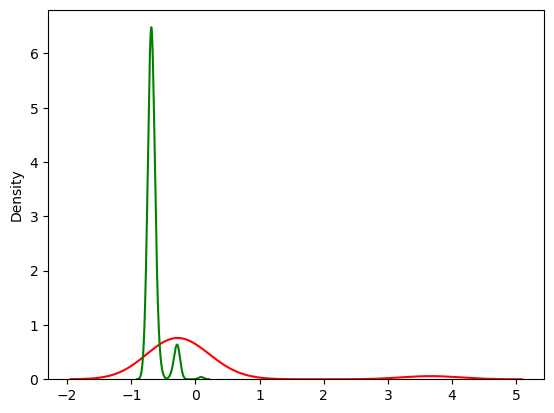

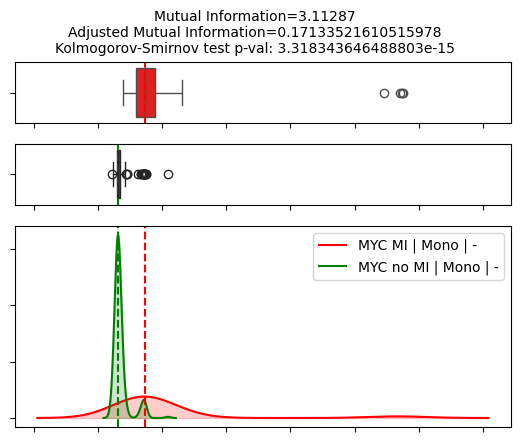

In [65]:
X, Y = get_groups('MYC MI', 'MYC no MI', 'monotot', 'monotot', 0, 0)

mu, sigma = get_mu_s(X)
X = np.array(normalize(X, mu, sigma))
Y = np.array(normalize(Y, mu, sigma))

kde_x = sns.kdeplot(X, color='red', gridsize=num_points).get_lines()[0].get_data()
kde_y = sns.kdeplot(Y, color='green', gridsize=num_points).get_lines()[1].get_data()

# Resample the KDEs to a common number of points
x_interp = np.linspace(kde_x[0].min(), kde_x[0].max(), num_points)
y_interp = np.linspace(kde_y[0].min(), kde_y[0].max(), num_points)
X_mod = np.interp(x_interp, kde_x[0], kde_x[1])
Y_mod = np.interp(y_interp, kde_y[0], kde_y[1])

plot_info(X, Y, x_interp, y_interp, X_mod, Y_mod, labels=['MYC MI | Mono | -', 'MYC no MI | Mono | -'], num_points=num_points)